In [10]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV


In [2]:
train = pd.read_csv('train.csv', index_col=0).sample(frac=1)
y_train = train['correct']
X_train = train.drop(columns=['name', 'firstChar', 'group', 'correct'])

test = pd.read_csv('test.csv', index_col=0).sample(frac=1)
y_test = test['correct']
X_test = test.drop(columns=['name', 'firstChar', 'group', 'correct'])

In [56]:
def show_rank_metrics(df_group: pd.DataFrame, df_proba: pd.DataFrame, df_true: pd.DataFrame):
    df_metric = pd.concat([df_group, df_proba, df_true], axis=1)
    df_metric = df_metric.sort_values(by=['group', 'proba', 'correct'], ascending=[True, False, True])
    print(df_metric.shape)
    positions = []
    cur_group = -1
    cur_pos = 1
    for row in df_metric.itertuples():
        cur_pos += 1
        if row.group != cur_group:
            cur_pos = 1
            cur_group = row.group
        if row.correct == 1:
            positions.append(cur_pos)
    print(f'\nmean = {np.mean(positions)}\n')

    count = [0] * 9
    for p in positions:
        count[p] += 1
    acc = 0
    sum_all = sum(count)
    for i, c in enumerate(count):
        acc += c
        print(f'top{i} = {acc / sum_all}')

In [3]:
s_tr = X_train.sum()
s_te = X_test.sum()

In [4]:
print(f'train median {s_tr.median() / X_train.shape[0] * 100} %')
print(f'test median {s_te.median() / X_test.shape[0] * 100} %')

train median 1.0424971210913279 %
test median 0.978129464776349 %


In [5]:
xs = X_train.iloc[:4 * 10 ** 4, :]
ys = y_train.iloc[:4 * 10 ** 4]

In [45]:
clf = LogisticRegression(random_state=0, C=1e-3, solver='saga', max_iter=10 ** 3, n_jobs=4).fit(xs, ys)

In [46]:
#clf.predict_proba(xs)

array([[0.87917061, 0.12082939],
       [0.87629041, 0.12370959],
       [0.87092629, 0.12907371],
       ...,
       [0.88001138, 0.11998862],
       [0.86640633, 0.13359367],
       [0.87427435, 0.12572565]])

/home/kirill/Documents/1.Projects/class-ranking/intellij-class-usages-analysis/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


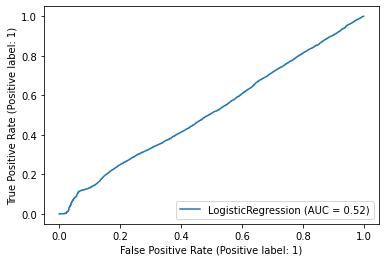

In [47]:
#metrics.plot_roc_curve(clf, X_test, y_test)

/home/kirill/Documents/1.Projects/class-ranking/intellij-class-usages-analysis/venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


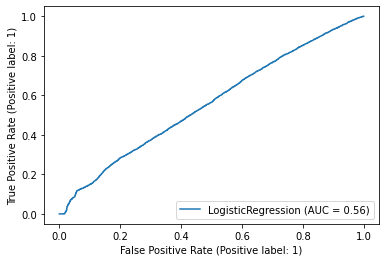

In [48]:
#metrics.plot_roc_curve(clf, xs, ys)

In [49]:
show_rank_metrics(
    df_group=pd.DataFrame(data=train['group'].iloc[:4 * 10 ** 4].tolist(), columns=['group']),
    df_proba=pd.DataFrame(data=clf.predict_proba(xs)[:,1], columns=['proba']),
    df_true=pd.DataFrame(data=ys.tolist(), columns=['correct'])
)

       group     proba  correct
15461      0  0.128365        0
7119       3  0.121371        0
4429       4  0.122083        0
1620       6  0.126172        0
13909      6  0.124702        0
...      ...       ...      ...
17737  42961  0.124975        0
9594   42963  0.130513        1
2275   42963  0.123785        0
33689  42965  0.126942        0
3186   42965  0.123431        0

[40000 rows x 3 columns]
mean = 1.4814888535031847
top0 = 0.0
top1 = 0.638734076433121
top2 = 0.9014729299363057
top3 = 0.9818869426751592
top4 = 0.9970143312101911
top5 = 0.9994028662420382
top6 = 1.0
top7 = 1.0
top8 = 1.0


In [50]:
show_rank_metrics(
    df_group=pd.DataFrame(data=test['group'].tolist(), columns=['group']),
    df_proba=pd.DataFrame(data=clf.predict_proba(X_test)[:,1], columns=['proba']),
    df_true=pd.DataFrame(data=y_test.tolist(), columns=['correct'])
)

       group     proba  correct
1716      24  0.150577        0
3403      24  0.150577        0
15734     24  0.150577        0
32566     24  0.150577        0
36745     24  0.150577        0
...      ...       ...      ...
49282  42897  0.122417        0
33136  42897  0.122237        0
67976  42897  0.121700        0
13672  42897  0.119419        0
59413  42897  0.119419        0

[72792 rows x 3 columns]
mean = 4.461259479063633
top0 = 0.0
top1 = 0.21562809099901087
top2 = 0.30772612374986263
top3 = 0.3871854049895593
top4 = 0.47730519837344765
top5 = 0.5880866029233982
top6 = 0.7170018683371799
top7 = 0.8458072315639081
top8 = 1.0


In [54]:
clf = LogisticRegression(random_state=0, C=1e-1, max_iter=10 ** 3, n_jobs=4).fit(xs, ys)

In [59]:
print("lin reg lbfgs\n")
show_rank_metrics(
    df_group=pd.DataFrame(data=test['group'].tolist(), columns=['group']),
    df_proba=pd.DataFrame(data=clf.predict_proba(X_test)[:,1], columns=['proba']),
    df_true=pd.DataFrame(data=y_test.tolist(), columns=['correct'])
)

lin reg lbfgs
(72792, 3)

mean = 4.483130014287284

top0 = 0.0
top1 = 0.2260687987690955
top2 = 0.30442905813825694
top3 = 0.38465765468732827
top4 = 0.4721397955819321
top5 = 0.5783053082756346
top6 = 0.7095285196175404
top7 = 0.8417408506429278
top8 = 1.0


In [61]:
clf = LogisticRegression(random_state=0, C=1e-1, max_iter=10 ** 3, n_jobs=4, penalty='l1', solver='saga').fit(xs, ys)
show_rank_metrics(
    df_group=pd.DataFrame(data=test['group'].tolist(), columns=['group']),
    df_proba=pd.DataFrame(data=clf.predict_proba(X_test)[:,1], columns=['proba']),
    df_true=pd.DataFrame(data=y_test.tolist(), columns=['correct'])
)

(72792, 3)

mean = 5.023848774590614

top0 = 0.0
top1 = 0.20551708979008682
top2 = 0.2599186723815804
top3 = 0.30794592812396965
top4 = 0.36839213100340695
top5 = 0.4552148587756896
top6 = 0.5950104407077701
top7 = 0.7841521046268821
top8 = 1.0
